# Actividad 5: Análisis de Series de Tiempo

Librerías que usaremos para esta actividad, en esta actividad se sumará statsmodels.api.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Características del dataframe anterior.

In [28]:
url="https://raw.githubusercontent.com/Carlos8abl/F-sica-Computacional-1/main/Actividad%201/Climatolog%C3%ADaDiaria26160.txt"

columnas=["FECHA", "PRECIP", "EVAP", "TMAX", "TMIN"]

df_dist = pd.read_csv(url, names=columnas, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

df_cop0=df_dist.copy()

str_Nulo= "Nulo"
df_cop1 = df_cop0.replace(to_replace=str_Nulo, value='No Medido', regex=True)

cols_list=["PRECIP", "EVAP", "TMAX", "TMIN"]
for cols in cols_list:
  df_cop1[cols]=pd.to_numeric(df_cop1[cols], errors='coerce')

df_cop2=df_cop1.copy()

df_cop2["FECHA"]=pd.to_datetime(df_cop2["FECHA"], dayfirst=True).copy()

df_cop2['Año'] = df_cop2['FECHA'].dt.year
df_cop2['Mes'] = df_cop2['FECHA'].dt.month

df_climat=df_cop2.copy()

df_climat.drop("Mes", axis=1, inplace=True)
df_climat["Mes"] = df_climat["FECHA"].dt.strftime("%b")

In [29]:
df_climat_ts=df_climat.copy()
df_climat_ts=df_climat_ts.set_index('FECHA')
print(df_climat_ts)

            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1969-01-02     0.0   NaN   NaN   0.0  1969  Jan
1969-01-03     0.0   NaN  24.0   2.0  1969  Jan
1969-01-04     0.0   NaN  25.0   3.0  1969  Jan
1969-01-06     0.0   NaN  22.0   4.0  1969  Jan
1969-01-07     0.0   NaN  21.0   3.0  1969  Jan
...            ...   ...   ...   ...   ...  ...
2016-04-26     0.0   NaN  27.0   9.0  2016  Apr
2016-04-27     0.0   NaN  31.0   6.0  2016  Apr
2016-04-28     0.0   NaN  28.0   8.0  2016  Apr
2016-04-29     0.0   NaN  30.0   6.0  2016  Apr
2016-04-30     0.0   NaN  30.0   7.0  2016  Apr

[14263 rows x 6 columns]


In [30]:
df_T90=df_climat_ts[(df_climat_ts['Año']>=1990) & (df_climat_ts['Año']<2017)]

Columnas=['PRECIP', 'EVAP', 'TMAX', 'TMIN', 'Año', 'Mes']
df_T90.columns=Columnas

print(df_T90)

            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1990-01-01     0.0   NaN  21.0  -0.5  1990  Jan
1990-01-02     5.5   NaN  18.0   0.5  1990  Jan
1990-01-03     0.0   NaN  13.0   1.0  1990  Jan
1990-01-04     0.0   NaN  17.0  -3.0  1990  Jan
1990-01-05    11.0   NaN  17.0  -3.0  1990  Jan
...            ...   ...   ...   ...   ...  ...
2016-04-26     0.0   NaN  27.0   9.0  2016  Apr
2016-04-27     0.0   NaN  31.0   6.0  2016  Apr
2016-04-28     0.0   NaN  28.0   8.0  2016  Apr
2016-04-29     0.0   NaN  30.0   6.0  2016  Apr
2016-04-30     0.0   NaN  30.0   7.0  2016  Apr

[9487 rows x 6 columns]


Text(0.5, 1.0, 'Precipitación de los últimos 30 años de Magdalena de Kino')

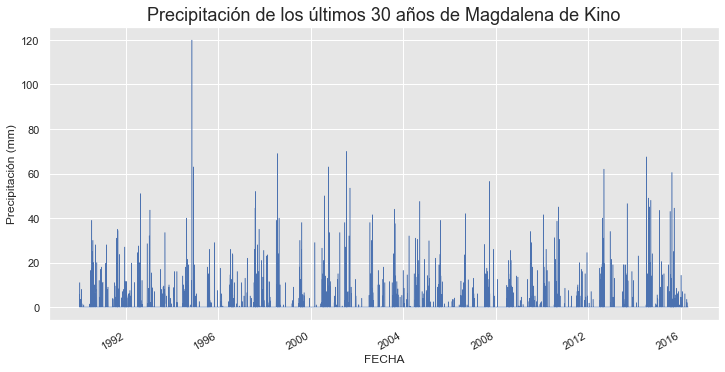

In [33]:
df_T90=df_climat_ts[(df_climat_ts['Año'] >= 1990) & (df_climat_ts['Año'] < 2017)]

sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

df_T90['PRECIP'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');
plt.title('Precipitación de los últimos 30 años de Magdalena de Kino', fontsize=18)

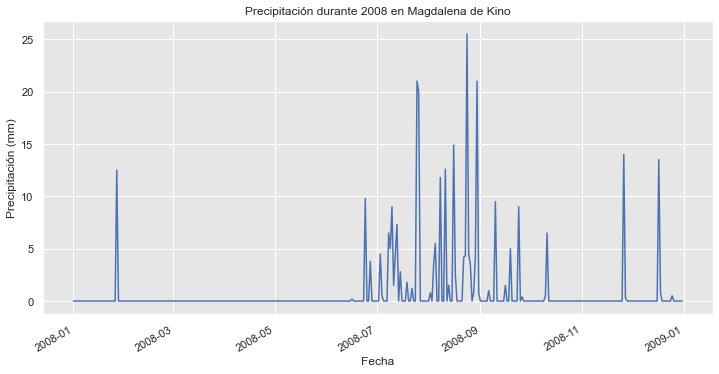

In [34]:
ax1=df_climat_ts.loc['2008','PRECIP'].plot()
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Fecha')
plt.title('Precipitación durante 2008 en Magdalena de Kino')
plt.show()

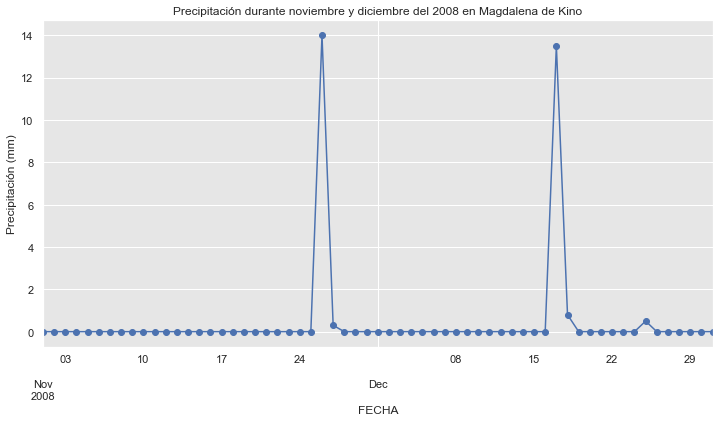

In [37]:
ax = df_T90.loc['2008-11-01':'2008-12-31', 'PRECIP'].plot(marker='o', linestyle='-')
ax1.set_xlabel('Fecha')
ax.set_ylabel('Precipitación (mm)');
plt.title('Precipitación durante noviembre y diciembre del 2008 en Magdalena de Kino')
plt.show()

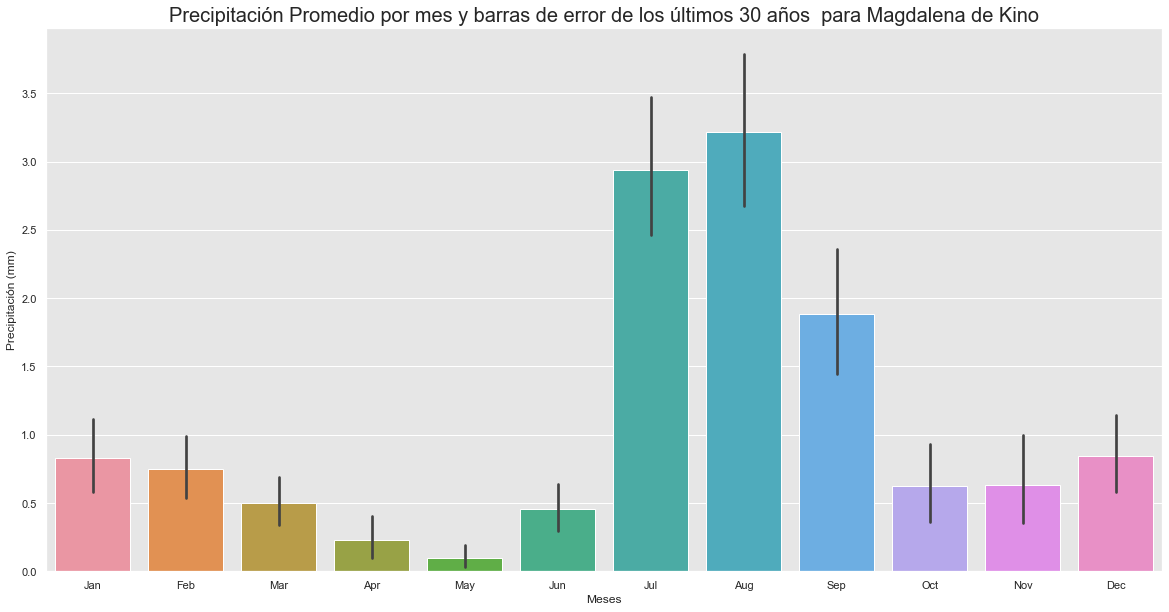

In [38]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,10))
g=sns.barplot(x='Mes', y='PRECIP', data=df_T90);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio por mes y barras de error de los últimos 30 años  para Magdalena de Kino', fontsize=20)
plt.show()

In [39]:
df_climat_90=df_climat_ts[(df_climat_ts['Año']>=1990)&(df_climat_ts['Año']<2017)]
df_climat_90.columns=Columnas
print(df_climat_90)

            PRECIP  EVAP  TMAX  TMIN   Año  Mes
FECHA                                          
1990-01-01     0.0   NaN  21.0  -0.5  1990  Jan
1990-01-02     5.5   NaN  18.0   0.5  1990  Jan
1990-01-03     0.0   NaN  13.0   1.0  1990  Jan
1990-01-04     0.0   NaN  17.0  -3.0  1990  Jan
1990-01-05    11.0   NaN  17.0  -3.0  1990  Jan
...            ...   ...   ...   ...   ...  ...
2016-04-26     0.0   NaN  27.0   9.0  2016  Apr
2016-04-27     0.0   NaN  31.0   6.0  2016  Apr
2016-04-28     0.0   NaN  28.0   8.0  2016  Apr
2016-04-29     0.0   NaN  30.0   6.0  2016  Apr
2016-04-30     0.0   NaN  30.0   7.0  2016  Apr

[9487 rows x 6 columns]


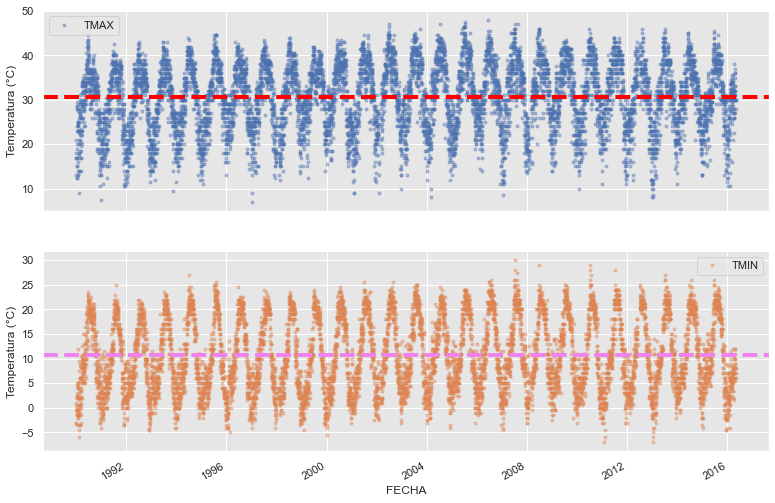

In [43]:
colsplot=['TMAX','TMIN']
ax_ylabels=['Temp. Máxima (°C)', 'Temp. Mínima (°C)','Evaporación (mm)']
Tmax_dT90=df_climat_90['TMAX'].mean()
Tmin_dT90=df_climat_90['TMIN'].mean()
axes=df_climat_90[colsplot].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)

for i, ax in zip(colsplot,axes):
  if i=='TMAX':
    ax.axhline(Tmax_dT90, color='red', linestyle='--', linewidth=4)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='TMIN':
    ax.axhline(Tmin_dT90, color='violet', linestyle='--', linewidth=4)
    ax.set_ylabel('Temperatura (°C)')

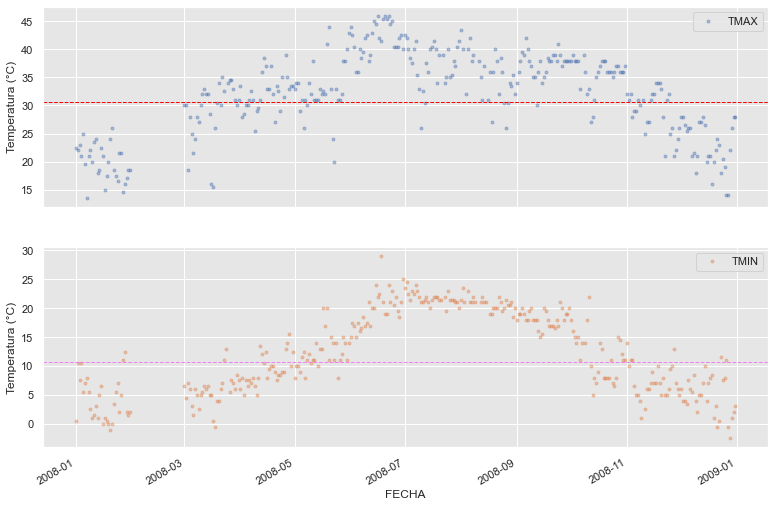

In [46]:
axes=df_climat_90[colsplot].loc["2008"].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)

for i, ax in zip(colsplot,axes):
  if i=='TMAX':
    ax.axhline(Tmax_dT90, color='red', linestyle='--', linewidth=1)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='TMIN':
    ax.axhline(Tmin_dT90, color='violet', linestyle='--', linewidth=1)
    ax.set_ylabel('Temperatura (°C)')

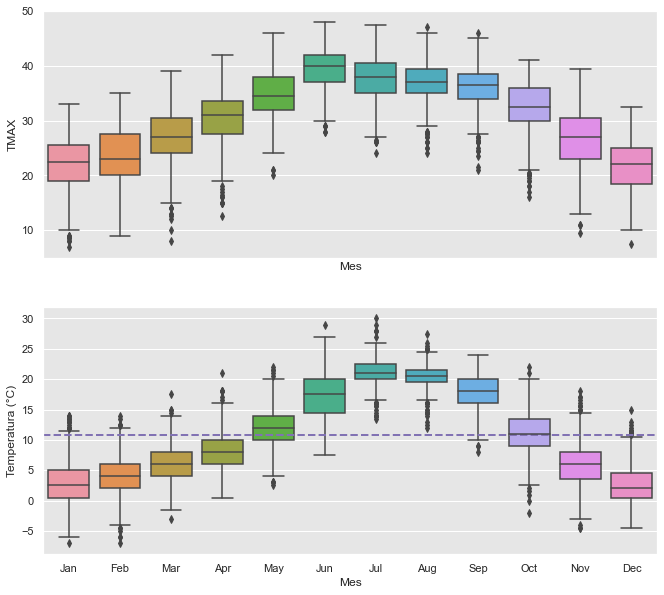

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
for i, a in zip(['TMAX', 'TMIN'], axes):
    sns.boxplot(data=df_climat_90, x='Mes', y=i, ax=a)
if i=='TMAX':
    a.axhline(Tmax_dT90, color='r', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
elif i=='TMIN':
    a.axhline(Tmin_dT90, color='m', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
ax.set_title(i)
if ax != axes[-1]:
    ax.set_xlabel('')

In [65]:
colosm=["TMAX", "TMIN"]

In [66]:
df_climat_90_7=df_climat_90[colosm].rolling(7, center=True, min_periods=1).mean()
df_climat_90_30=df_climat_90[colosm].rolling(30, center=True, min_periods=1).mean()
df_climat_90_365=df_climat_90[colosm].rolling(365, center=True, min_periods=1).mean()

In [67]:
inicio, fin = '2004-01', '2005-01'

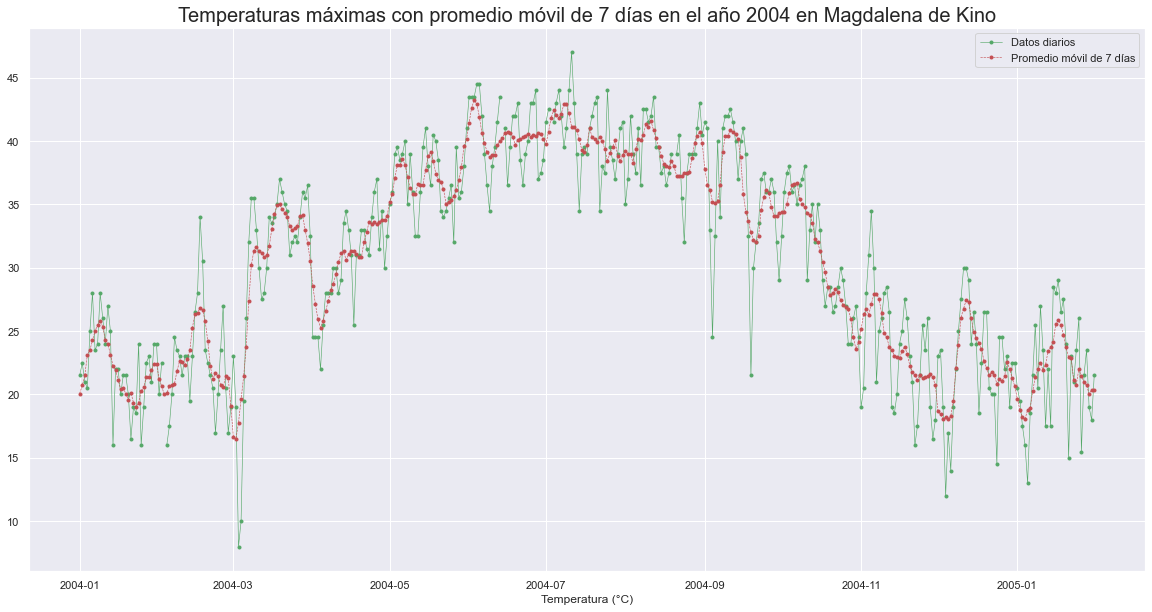

In [71]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMAX'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_7.loc[inicio:fin, 'TMAX'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 7 días en el año 2004 en Magdalena de Kino', fontsize=20)
ax.legend()

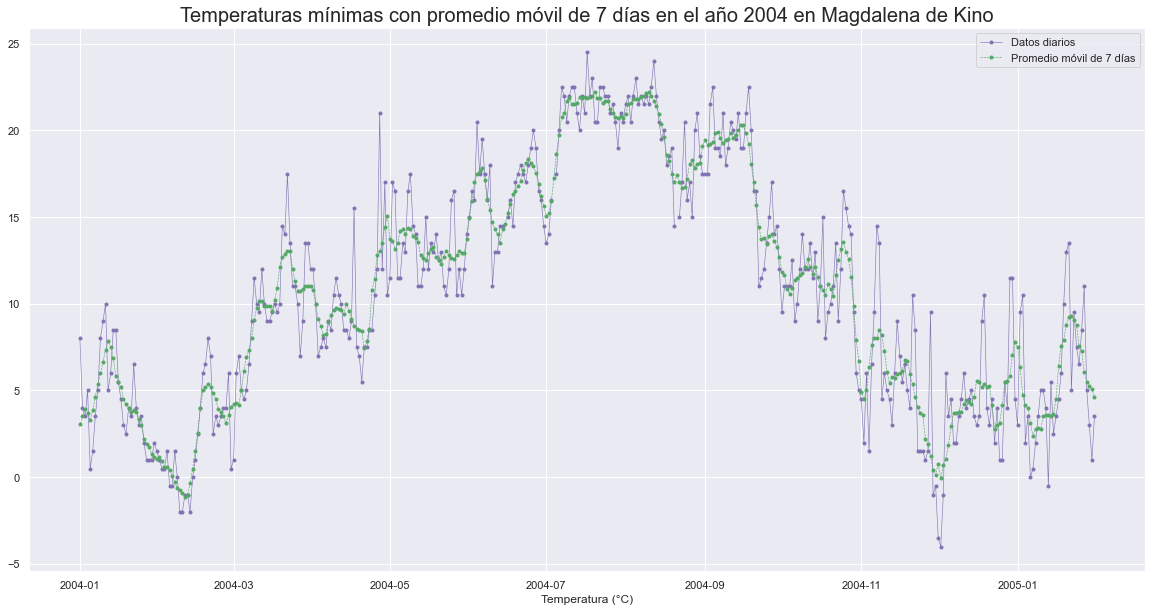

In [72]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMIN'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_7.loc[inicio:fin, 'TMIN'], marker='.', linestyle='--', linewidth=0.6, color='g', label='Promedio móvil de 7 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas con promedio móvil de 7 días en el año 2004 en Magdalena de Kino', fontsize=20)
ax.legend()

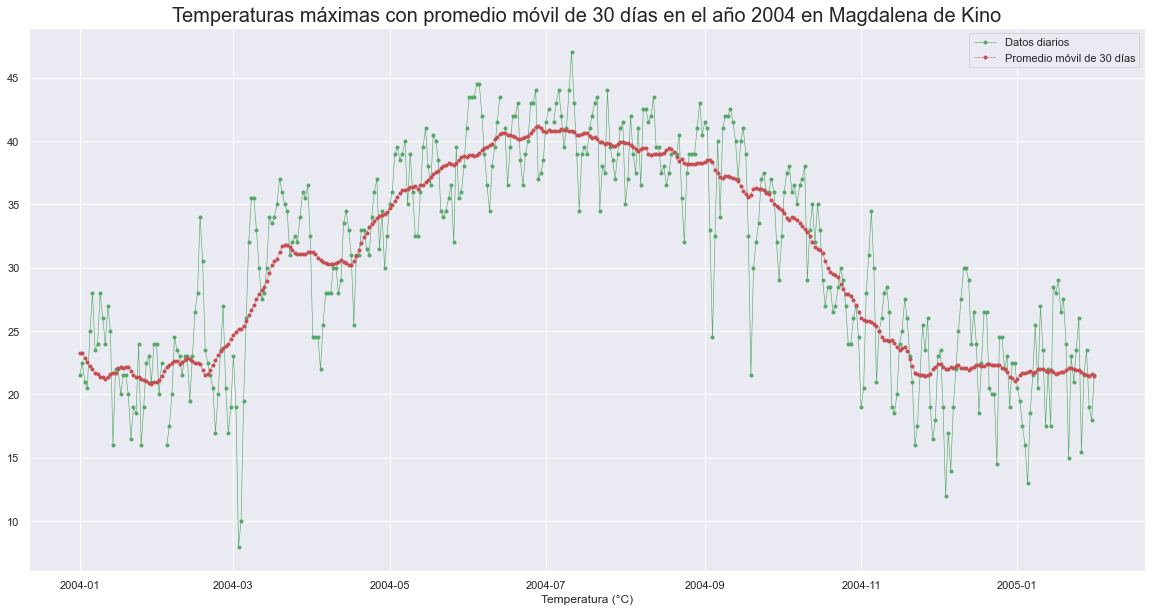

In [73]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMAX'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_30.loc[inicio:fin, 'TMAX'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 30 días en el año 2004 en Magdalena de Kino', fontsize=20)
ax.legend()

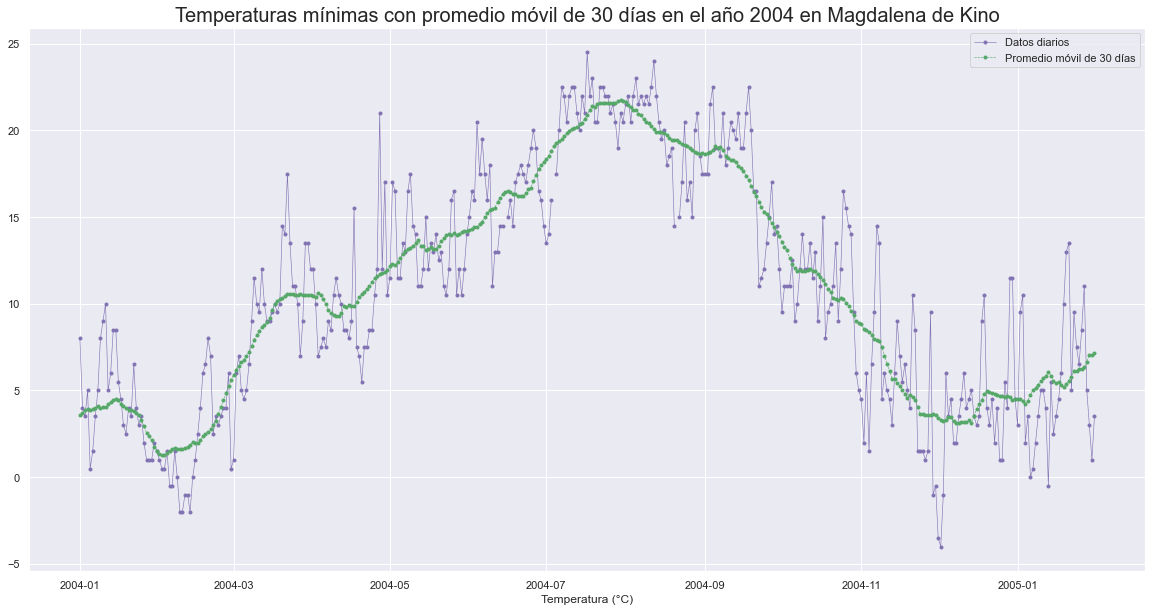

In [74]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMIN'], marker='.', linestyle='-',color='m', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_30.loc[inicio:fin, 'TMIN'], marker='.', linestyle='--', linewidth=0.6, color='g', label='Promedio móvil de 30 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas con promedio móvil de 30 días en el año 2004 en Magdalena de Kino', fontsize=20)
ax.legend()

In [75]:
inicio, fin = '2004-01', '2016-12'

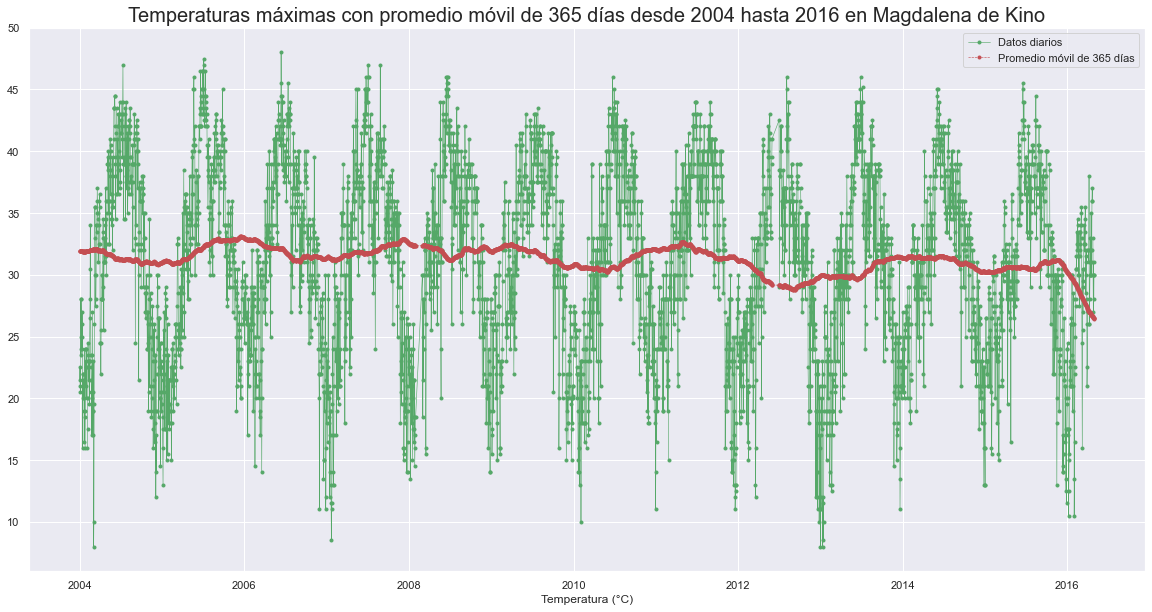

In [76]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMAX'], marker='.', linestyle='-',color='g', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_365.loc[inicio:fin, 'TMAX'], marker='.', linestyle='--', linewidth=0.6, color='r', label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas con promedio móvil de 365 días desde 2004 hasta 2016 en Magdalena de Kino', fontsize=20)
ax.legend()

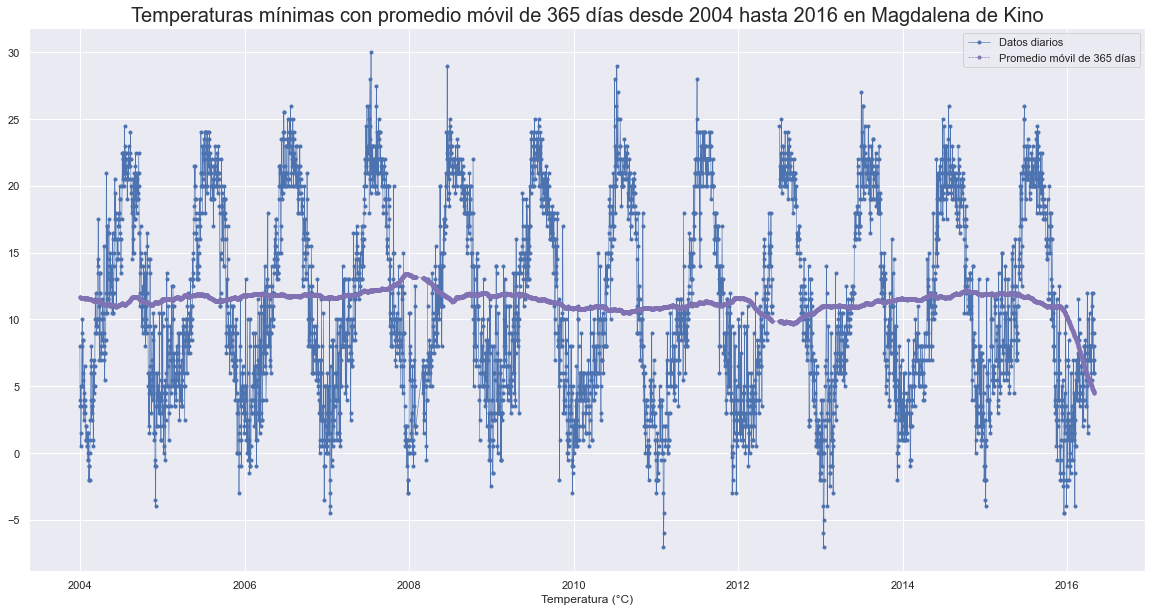

In [79]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(20,10)})
fig, ax=plt.subplots()
ax.plot(df_climat_90.loc[inicio:fin, 'TMIN'], marker='.', linestyle='-',color='b', linewidth=0.6, label='Datos diarios')
ax.plot(df_climat_90_365.loc[inicio:fin, 'TMIN'], marker='.', linestyle='--', linewidth=0.6, color='m', label='Promedio móvil de 365 días')
ax.set_xlabel('Fecha')
ax.set_xlabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas con promedio móvil de 365 días desde 2004 hasta 2016 en Magdalena de Kino', fontsize=20)
ax.legend()

<ipython-input-84-a9dce6ea0942>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resTMAX = sm.tsa.seasonal_decompose(df_climat_90_365.loc[start:end, 'TMAX'].interpolate(), freq=decompfreq, model='additive')


Text(0.5, 1.0, 'Descomposición Aditiva de la temperatura máxima (promedio Móvil 365 días)')

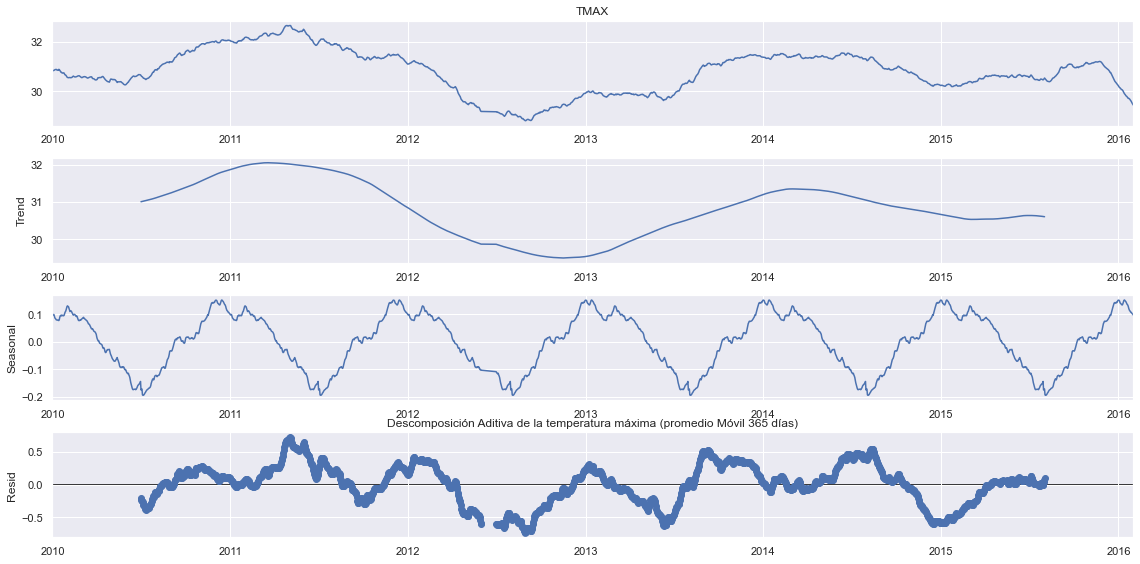

In [84]:
sns.set(rc={'figure.figsize':(16, 8)})
start, end='2010-01', '2016-01'
decompfreq=365
resTMAX = sm.tsa.seasonal_decompose(df_climat_90_365.loc[start:end, 'TMAX'].interpolate(), freq=decompfreq, model='additive')
resTMAX.plot()
plt.title('Descomposición Aditiva de la temperatura máxima (promedio Móvil 365 días)')

<ipython-input-86-cc0b5403c6f2>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resTMIN = sm.tsa.seasonal_decompose(df_climat_90_365.loc[start:end, 'TMIN'].interpolate(), freq=decompfreq, model='additive')


Text(0.5, 1.0, 'Descomposición Aditiva de la temperatura mínima (promedio Móvil 365 días)')

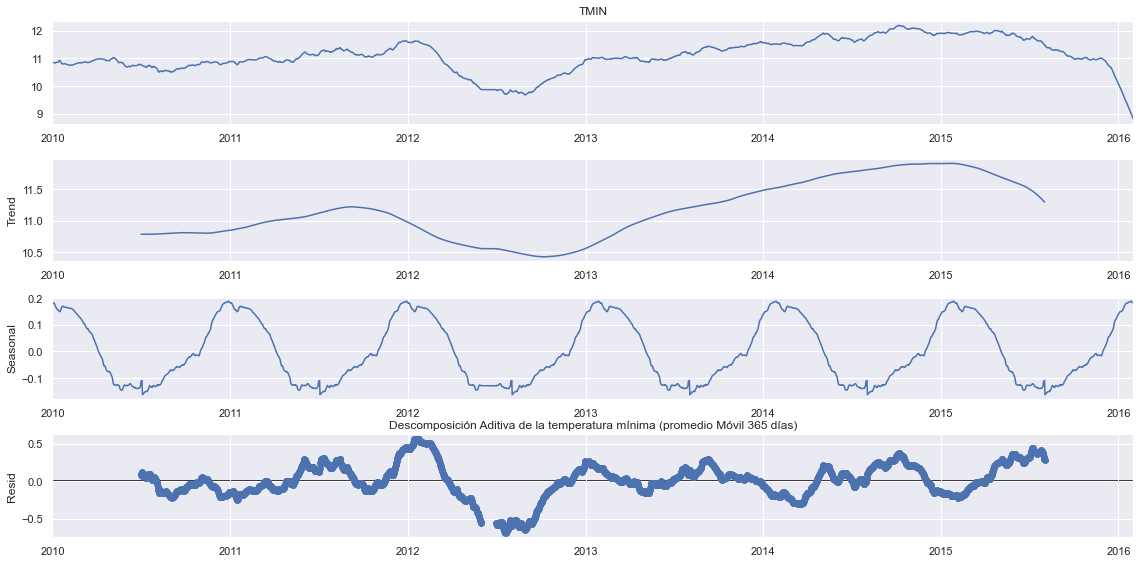

In [86]:
sns.set(rc={'figure.figsize':(16, 8)})
start, end='2010-01', '2016-01'
decompfreq=365
resTMIN = sm.tsa.seasonal_decompose(df_climat_90_365.loc[start:end, 'TMIN'].interpolate(), freq=decompfreq, model='additive')
resTMIN.plot()
plt.title('Descomposición Aditiva de la temperatura mínima (promedio Móvil 365 días)')

In [87]:
df_T60= df_climat_ts[(df_climat_ts['Año'] >= 1960) & (df_climat_ts['Año'] < 1990)]
df_T90= df_climat_ts[(df_climat_ts['Año'] >= 1990) & (df_climat_ts['Año'] < 2017)]

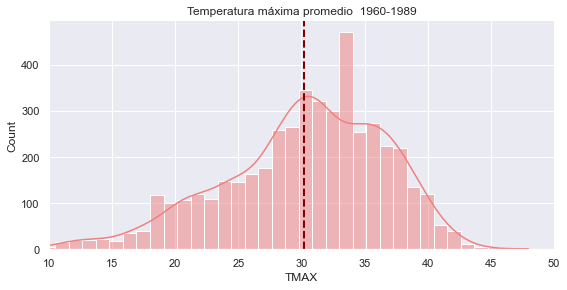

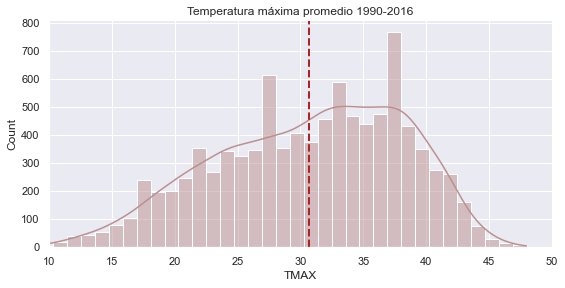

TMAX_promedio df_T60 =  30.23251336898396 ºC
TMAX_promedio df_T90 =  30.690136957214143 ºC


In [92]:
g1 = sns.displot(df_T60["TMAX"], kde=True, color='lightcoral', height=4, aspect=2);
plt.axvline(df_T60.TMAX.mean(), linestyle='--', linewidth=2, color='maroon');

g2 = sns.displot(df_T90["TMAX"], kde=True, color='rosybrown', height=4, aspect=2);
plt.axvline(df_T90.TMAX.mean(), linestyle='--', linewidth=2, color='firebrick');

g1.set(title='Temperatura máxima promedio  1960-1989');
g2.set(title='Temperatura máxima promedio 1990-2016');

g1.set(xlim=(10,50))
g2.set(xlim=(10,50))

plt.show();

print('TMAX_promedio df_T60 = ', df_T60.TMAX.mean(), 'ºC' )
print('TMAX_promedio df_T90 = ', df_T90.TMAX.mean(), 'ºC' )

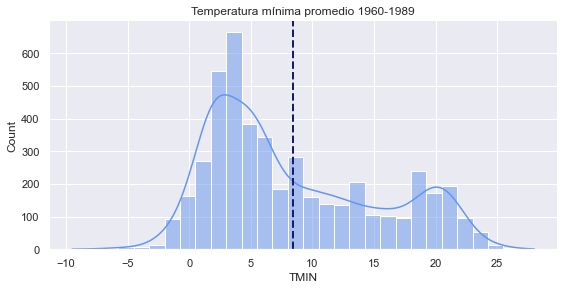

In [105]:
g1 = sns.displot(df_T60["TMIN"], kde=True, color='cornflowerblue', height=4, aspect=2);
plt.axvline(df_T60.TMIN.mean(), linestyle='--', linewidth=2, color='midnightblue');
g1.set(title='Temperatura mínima promedio 1960-1989');

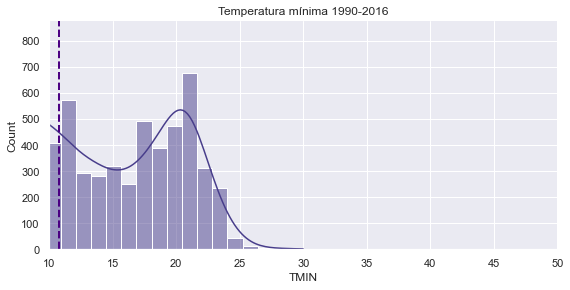

In [102]:
g2 = sns.displot(df_T90["TMIN"], kde=True, color='darkslateblue', height=4, aspect=2);
plt.axvline(df_T90.TMIN.mean(), linestyle='--', linewidth=2, color='indigo');
g2.set(title='Temperatura mínima 1990-2016');
g2.set(xlim=(10,50))

In [99]:
plt.show();

print('TMIN_promedio df_T60 = ', df_T60.TMIN.mean(), 'ºC' )
print('TMIN_promedio df_T90 = ', df_T90.TMIN.mean(), 'ºC' )

TMIN_promedio df_T60 =  8.394483643361129 ºC
TMIN_promedio df_T90 =  10.783756237392504 ºC
